In [1]:
# Dependencies
import pandas as pd
from sqlalchemy import create_engine
import sqlalchemy as sql
import seaborn as sns
import matplotlib.pyplot as plt
from config import username
from config import password

In [2]:
# Connect to database 
# username = "postgres"
# password = "postgres"
connect_string = 'postgresql://' + username + ':' + password + '@localhost:5432/SQLHomework_db'
sql_engine = sql.create_engine(connect_string)

In [3]:
# query to find most common salary groups

query = """ SELECT CASE
         WHEN S.salary <= 50000 THEN '40-50K'
         WHEN S.salary <= 60000 THEN '50-60K'  
		 WHEN S.salary <= 70000 THEN '60-70K'  
		 WHEN S.salary <= 80000 THEN '70-80K'  
		 WHEN S.salary <= 90000 THEN '80-90K'  
		 WHEN S.salary <= 100000 THEN '90-100K'  
         ELSE '100K Plus' 
         END AS "Groups", 
         COUNT(*) AS n
FROM salaries S join employees E on S.emp_no = E.emp_no
GROUP BY CASE 
         WHEN S.salary <= 50000 THEN '40-50K' 
         WHEN S.salary <= 60000 THEN '50-60K'  
		 WHEN S.salary <= 70000 THEN '60-70K'  
		 WHEN S.salary <= 80000 THEN '70-80K'  
		 WHEN S.salary <= 90000 THEN '80-90K'  
		 WHEN S.salary <= 100000 THEN '90-100K'  
         ELSE '100K Plus' 
         END
ORDER BY "Groups"; """

salary_groups_df = pd.read_sql_query(query, sql_engine)

salary_groups_df

,Groups,n
0,100K Plus,1287
1,40-50K,158472
2,50-60K,57917
3,60-70K,41405
4,70-80K,24814
5,80-90K,11844
6,90-100K,4285


In [4]:
query = "select S.salary from salaries S join employees E on S.emp_no = E.emp_no  where S.salary <= '90000'  and  S.salary >= '40000' order by S.salary"

salary_df = pd.read_sql_query(query, sql_engine)

Text(0, 0.5, 'Number of Employees')

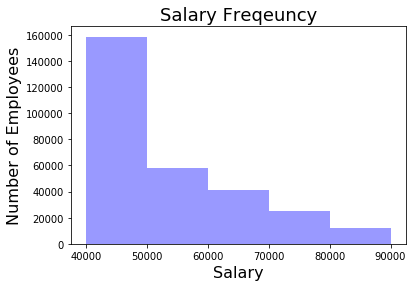

In [5]:
sns.distplot(salary_df['salary'], kde=False, color='blue', bins=5)
plt.title('Salary Freqeuncy', fontsize=18)
plt.xlabel('Salary', fontsize=16)
plt.ylabel('Number of Employees', fontsize=16)

In [6]:
# Calculate avergae salary by title"

query = """select T.title_id, T.title as "Title", round(avg(S.salary),2) as "AverageSalary"
from salaries S
join employees E
on S.emp_no= E.emp_no
join titles T
on E.title_id = T.title_id
group by T.title_id;"""

avgsalary_df = pd.read_sql_query(query, sql_engine)
avgsalary_df

,title_id,Title,AverageSalary
0,e0001,Assistant Engineer,48564.43
1,e0002,Engineer,48535.34
2,e0003,Senior Engineer,48506.80
3,e0004,Technique Leader,48582.90
4,m0001,Manager,51531.04
5,s0001,Staff,58465.38
6,s0002,Senior Staff,58550.17


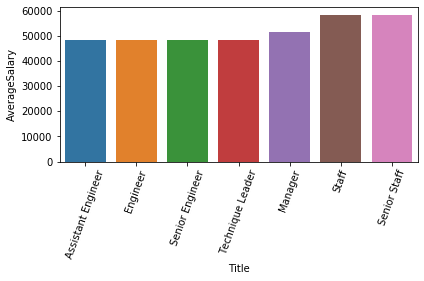

In [7]:
sns.barplot(data = avgsalary_df,x = 'Title',y = 'AverageSalary')

plt.xticks(rotation=70)
plt.tight_layout()